## Теория вероятностей и Математическая статистика

### Тема-3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

#### ДР

In [1]:
from math import factorial as fct


# сочетания
def combinations(n, k):
    return int(fct(n) / (fct(k) * fct(n - k)))


# размещения
def arrangements(n, k):
    return int(fct(n) / fct(n - k))


# перестановки
def permutations(n):
    return int(fct(n))


##### 1.

Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. 

Посчитать (желательно без использования статистических методов наподобие std, var, mean):
- среднее арифметическое, 
- среднее квадратичное отклонение, 
- смещенную и 
- несмещенную оценки дисперсий для данной выборки.

In [2]:
lst = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

расчёты вручную:

In [3]:
def mean(lst):
    return sum(lst) / len(lst)


In [4]:
mean(lst)

65.3

In [5]:
def dispersion(lst, ddof=0):
    mean_lst = mean(lst)
    return sum((x - mean_lst) ** 2 for x in lst) / (len(lst) - ddof)


def std(lst, ddof=0):
     return dispersion(lst, ddof=ddof) ** 0.5


In [6]:
std(lst)

30.823854398825596

In [7]:
dispersion(lst)

950.11

In [8]:
dispersion(lst, ddof=1)

1000.1157894736842

расчёты встроенными стредствами:

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.DataFrame(lst, columns=['v'])
df.head()

,v
0,100
1,80
2,75
3,77
4,89


In [11]:
df['v'].mean()

65.3

In [12]:
df['v'].std(ddof=0)

30.823854398825596

In [13]:
df['v'].var(ddof=0)

950.11

In [14]:
df['v'].var(ddof=1)

1000.1157894736842

бонус вне задания:

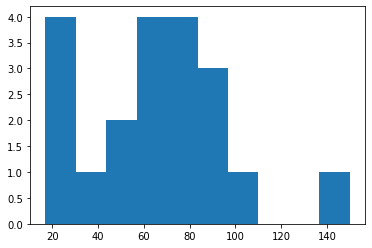

In [15]:
plt.hist(df['v'])
plt.show()

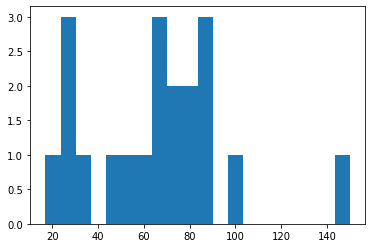

In [16]:
plt.hist(df['v'], bins = 20)
plt.show()

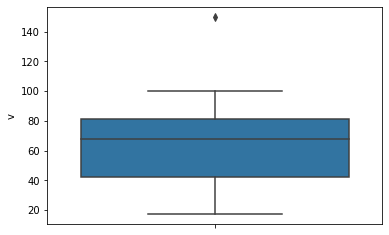

In [17]:
sns.boxplot(df['v'], orient='v')
plt.show()

In [18]:
df['v'].describe()

count     20.000000
mean      65.300000
std       31.624607
min       17.000000
25%       42.000000
50%       67.500000
75%       81.000000
max      150.000000
Name: v, dtype: float64

##### 2.

В первом ящике находится 8 мячей, из которых 5 - белые. 
Во втором ящике - 12 мячей, из которых 5 белых. 
Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. 

Какова вероятность того, что 3 мяча белые?

In [19]:
def box(x, y, n, k):
    return combinations(k, x) * combinations (n-k, y-x) / combinations(n, y)
    

def box1(x, y=2):
    return box(x, y, n=8, k=5)


def box2(x, y=4):
    return box(x, y, n=12, k=5)


def boxes(x1, x2):
    return box1(x1) * box2(x2)

3 белых мяча (ящик1 / ящик2), варианты:
- 0 / 3
- 1 / 2
- 2 / 1

In [20]:
boxes(0, 3) + boxes(1, 2) + boxes(2, 1)

0.3686868686868687